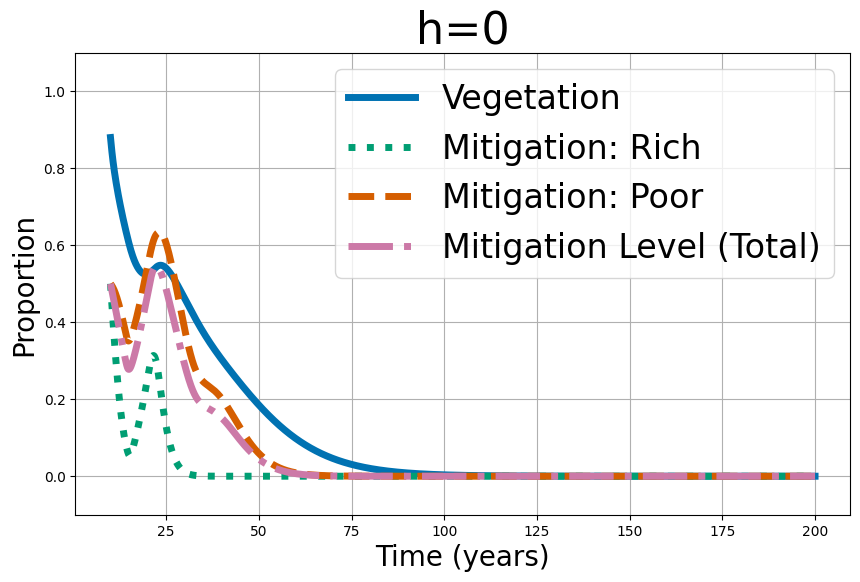

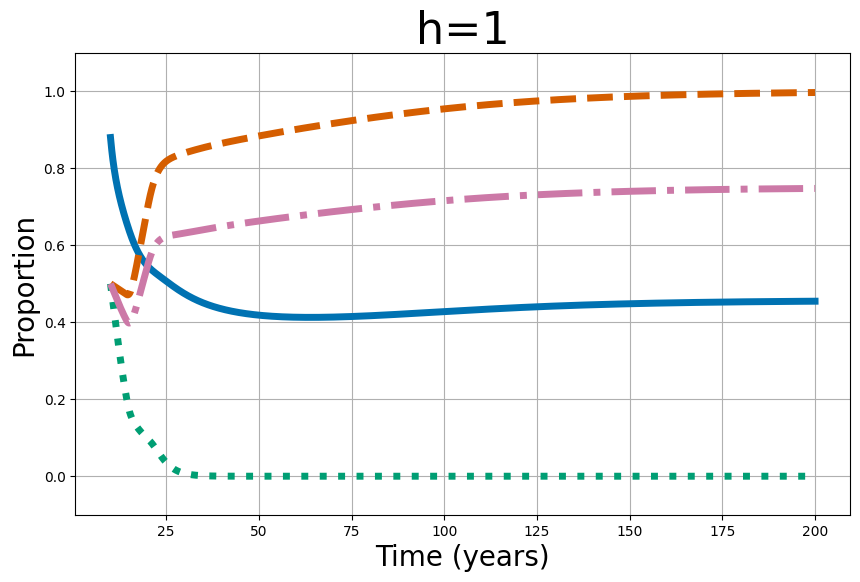

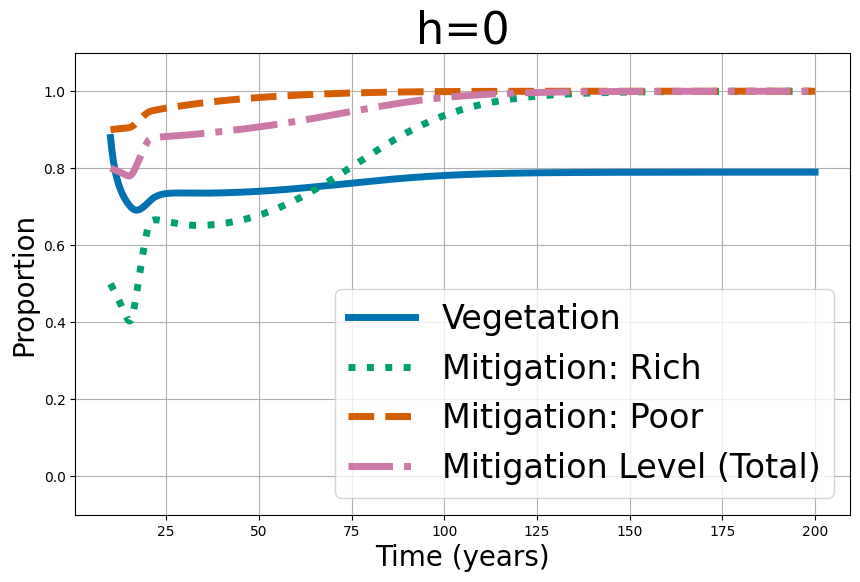

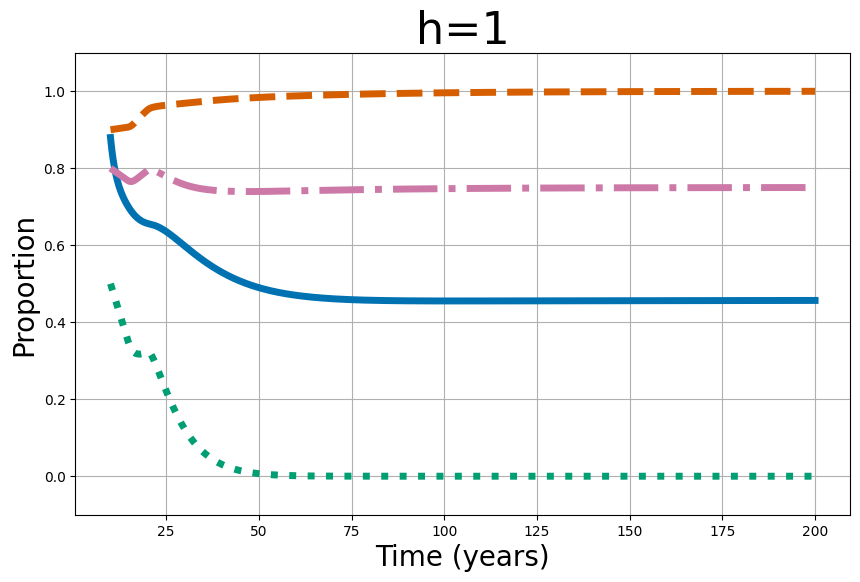

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from ddeint import ddeint
from scipy.integrate import odeint
#import ipywidgets as widgets
from IPython.display import display
import seaborn as sns
from dde_figs import uncoupled_model, model, history_function
from heterogeneous_pop import heterogeneous_pop_model, doub_history_function
from matplotlib import style 
import matplotlib.pyplot as plt 
plt.style.use('seaborn-v0_8-colorblind')

gamma = 0.2
time_delay = 10
tspan = np.linspace(time_delay, 200, 10000)

def plot_model(v0, Tv, Tc, fmax, alpha_r, delta, kappa, alpha_p0, xr0, xp0, ir0, ip0, rho, cr, cp, kr, kp, h, d, w, omega, dc, s):
    test = ddeint(heterogeneous_pop_model, doub_history_function(v0, Tv, xr0, xp0), tspan, fargs=(time_delay, Tv, Tc, fmax, alpha_r, delta, kappa, alpha_p0, xr0, xp0, ir0, ip0, rho, cr, cp, kr, kp, h, d, w, omega, dc, s))

    plt.figure(figsize=(10, 6))
    plt.plot(tspan, test[:, 0], linewidth=5, label="Vegetation")
    plt.plot(tspan, test[:, 1], linewidth=5, label="Mitigation: Rich")
    plt.plot(tspan, test[:, 2], linewidth=5, label="Mitigation: Poor")
    average_x = rho * test[:, 1] + (1-rho) * test[:,2]
    plt.plot(tspan, average_x, linestyle='dashed', label="Mitigation Level (Total)")
    plt.xlabel("Time (years)")
    plt.ylim(0, 1)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_bad_model(v0, Tv, Tc, fmax, alpha_r, delta, kappa, alpha_p0, xr0, xp0, ir0, ip0, rho, cr, cp, kr, kp, h, d, w, omega, dc, s):
    test = ddeint(heterogeneous_pop_model, doub_history_function(v0, Tv, xr0, xp0), tspan, fargs=(time_delay, Tv, Tc, fmax, alpha_r, delta, kappa, alpha_p0, xr0, xp0, ir0, ip0, rho, cr, cp, kr, kp, h, d, w, omega, dc, s))

    plt.figure(figsize=(10, 6))
    plt.plot(tspan, test[:, 0], linewidth=5, label="Vegetation")
    plt.plot(tspan, test[:, 1], linewidth=5, linestyle='dotted', label="Mitigation: Rich")
    plt.plot(tspan, test[:, 2], linewidth=5, linestyle='dashed', label="Mitigation: Poor")
    average_x = rho * test[:, 1] + (1-rho) * test[:,2]
    #print(average_x)
    plt.plot(tspan, average_x, linewidth=5, linestyle='dashdot', label="Mitigation Level (Total)")
    plt.xlabel("Time (years)", fontsize=20)
    plt.ylabel("Proportion", fontsize=20)
    plt.ylim(-0.1, 1.1)
    plt.title(f"h={h}", fontsize=32)
    if h==0:
        plt.legend(fontsize=24)
    plt.grid(True)
    plt.savefig(f"badslidersh{h}.png")
    plt.show()

plot_bad_model(0.1, 31.5, 1.5, 5,0.5,1,0.05,1,0.5,0.5,5,3.5,0.25,0.4,0.85,1,1.5, 0 ,5,3,3,1.5,1)

plot_bad_model(0.1,31.5,1.5,5,0.5,1,0.05,1,0.5,0.5,5,3.5,0.25,0.4,0.85,1,1.5, 1 ,5,3,3,1.5,1)


def plot_good_model(v0, Tv, Tc, fmax, alpha_r, delta, kappa, alpha_p0, xr0, xp0, ir0, ip0, rho, cr, cp, kr, kp, h, d, w, omega, dc, s):
    test = ddeint(heterogeneous_pop_model, doub_history_function(v0, Tv, xr0, xp0), tspan, fargs=(time_delay, Tv, Tc, fmax, alpha_r, delta, kappa, alpha_p0, xr0, xp0, ir0, ip0, rho, cr, cp, kr, kp, h, d, w, omega, dc, s))

    plt.figure(figsize=(10, 6))
    plt.plot(tspan, test[:, 0], linewidth=5, label="Vegetation")
    plt.plot(tspan, test[:, 1], linewidth=5, linestyle='dotted', label="Mitigation: Rich")
    plt.plot(tspan, test[:, 2], linewidth=5, linestyle = 'dashed',label="Mitigation: Poor")
    average_x = rho * test[:, 1] + (1-rho) * test[:,2]
    #print(average_x)
    plt.plot(tspan, average_x, linewidth=5, linestyle='dashdot', label="Mitigation Level (Total)")
    plt.xlabel("Time (years)", fontsize=20)
    plt.ylabel("Proportion", fontsize=20)
    plt.ylim(-0.1, 1.1)
    plt.title(f"h={h}", fontsize=32)
    if h==0:
        plt.legend(fontsize=24)
    plt.grid(True)
    plt.savefig(f"goodslidersh{h}.png")
    plt.show()

plot_good_model(0.1, 31.5, 1.5, 5,0.5,1,0.05,1,0.5,0.9,5,3.5,0.25,0.4,0.85,1,1.5, 0 ,1.5,3,3,1.5,1)

plot_good_model(0.1,31.5,1.5,5,0.5,1,0.05,1,0.5,0.9,5,3.5,0.25,0.4,0.85,1,1.5, 1 ,1.5,3,3,1.5,1)

